# Logistic Regression using Mini-batch Gradient Descent for Iris dataset

#### Import libs

In [2]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

#### Load data

**Notes: In this case, we only use 2 classes in Iris dataset for the purpose of logistic regression.**

In [3]:
iris = datasets.load_iris()
X = iris.data
y = iris.target
X = np.array([X[i] for i in range(len(X)) if y[i] != 2])
y = np.array([y[i] for i in range(len(y)) if y[i] != 2])
y = y.reshape(-1,1)
X.shape, y.shape

((100, 4), (100, 1))

#### Prepare data

**Split the original data into train data and test data with the ratio 8:2.**

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)
(X_train.shape, y_train.shape), (X_test.shape, y_test.shape)

(((80, 4), (80, 1)), ((20, 4), (20, 1)))

In [15]:
class LogisticRegression:

    def sigmoid(self,z):
        '''
        This function applies the sigmoid function to z.
        '''

        return 1/(1 + np.exp(-z))

    def calculate_loss(self,y,y_hat):
        '''
        This function returns the binary cross-entropy loss function for y and y_hat.
        '''

        return -(y*np.log(y_hat) + (1-y)*np.log(1-y_hat)).mean()
    
    def calculate_gradient(self,X,y,y_hat):
        '''
        This function calculates the gradient for X, y and y_hat.
        '''

        return np.dot(X.T,y_hat-y) / y.size
    
    def predict(self,X,theta):
        '''
        This function returns the predicted values for current X and theta.
        '''

        y_hat = self.sigmoid(np.dot(X,theta))
        return y_hat
    
    def fit(self,X_train,y_train,val,epochs=100,lr=0.01,batch_size=32,verbose=10):
        '''
        This function fits the data provided.
        - losses: save loss after every iteration
        - epoch_losses: save loss after one epoch
        - train_accs: save accuracy on train data
        - val_accs: save accuracy on validate data
        - weights: store weights of model
        '''

        losses = []
        epoch_losses = []
        train_accs = []
        val_accs = []
        
        weights = np.random.rand(X_train.shape[1]+1,1)
        
        X_train = np.concatenate((np.ones((X_train.shape[0],1)),X_train),axis=1)

        X_val, y_val = val
        X_val = np.concatenate((np.ones((X_val.shape[0],1)),X_val),axis=1)

        n_samples = X_train.shape[0]
        n_steps = int(np.ceil(X_train.shape[0] // batch_size))
        
        for epoch in range(epochs):
            id_permutations = np.random.permutation(n_samples)

            X_train_shuffled = X_train[id_permutations]
            y_train_shuffled = y_train[id_permutations]
            
            epoch_loss = 0
            for step in range(n_steps):
                Xi = X_train_shuffled[step*batch_size:(step+1)*batch_size]
                yi = y_train_shuffled[step*batch_size:(step+1)*batch_size]
                
                y_hat = self.predict(Xi,weights)
                loss = self.calculate_loss(yi,y_hat)
                losses.append(loss)
                epoch_loss += loss
                
                gradient = self.calculate_gradient(Xi,yi,y_hat)
                weights -= lr * gradient

                y_train_pred = self.predict(Xi,weights).round()
                train_acc = (y_train_pred == yi).mean()
                train_accs.append(train_acc)

                y_val_pred = self.predict(X_val,weights).round()
                val_acc = (y_val_pred == y_val).mean()
                val_accs.append(val_acc)
            
            epoch_loss /= n_steps
            epoch_losses.append(epoch_loss)

            y_val_pred = self.predict(X_val,weights).round()
            val_acc = (y_val_pred == y_val).mean()
            
            if epoch % verbose == 0 or epoch == epochs-1:
                print(f'Epoch {epoch} ----- loss: {round(epoch_loss,4)}, acc: {round(val_acc,4)}')
            
        self.weights = weights
        self.losses = losses
        self.epoch_losses = epoch_losses
        self.train_accs = train_accs
        self.val_accs = val_accs

    def score(self,X_test,y_test):
        X_test = np.concatenate((np.ones((X_test.shape[0],1)),X_test),axis=1)
        y_hat = self.predict(X_test,self.weights).round()
        acc = (y_hat == y_test).mean()
        return acc

Epoch 0 ----- loss: 2.11, acc: 0.45
Epoch 50 ----- loss: 1.2781, acc: 0.45
Epoch 100 ----- loss: 0.8699, acc: 0.45
Epoch 150 ----- loss: 0.7682, acc: 0.45
Epoch 200 ----- loss: 0.7277, acc: 0.45
Epoch 250 ----- loss: 0.6796, acc: 0.45
Epoch 300 ----- loss: 0.6524, acc: 0.45
Epoch 350 ----- loss: 0.5881, acc: 0.5
Epoch 400 ----- loss: 0.581, acc: 0.85
Epoch 450 ----- loss: 0.541, acc: 0.95
Epoch 499 ----- loss: 0.5141, acc: 1.0


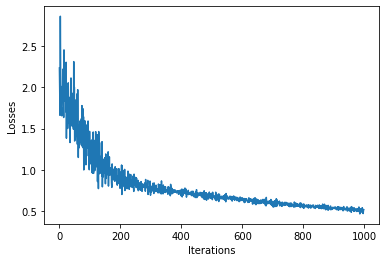

In [22]:
model = LogisticRegression()
model.fit(X_train,y_train,val=(X_test,y_test),lr=0.001,batch_size=32,epochs=500,verbose=50)

plt.xlabel('Iterations')
plt.ylabel('Losses')
plt.plot(model.losses)

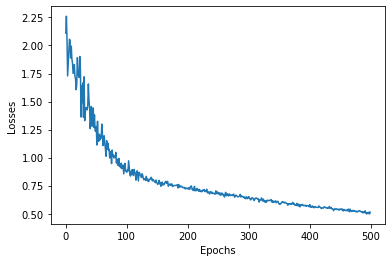

In [23]:
plt.xlabel('Epochs')
plt.ylabel('Losses')
plt.plot(model.epoch_losses)

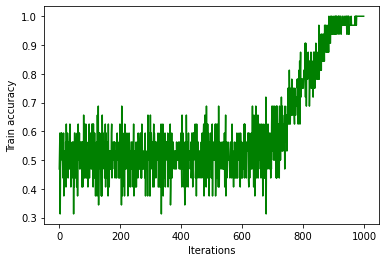

In [24]:
plt.xlabel('Iterations')
plt.ylabel('Train accuracy')
plt.plot(model.train_accs,c='g')

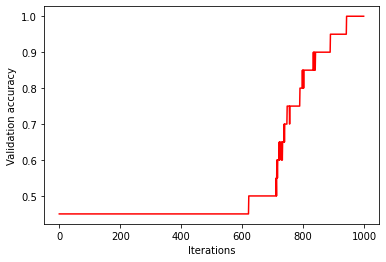

In [25]:
plt.xlabel('Iterations')
plt.ylabel('Validation accuracy')
plt.plot(model.val_accs,c='r')

In [26]:
f'Accuracy: {model.score(X_test,y_test)}'

'Accuracy: 1.0'